# Assignment 1


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas.*

## Group Members

*Group submission is highly encouraged. If you submit as part of group, list all group members here. Groups can comprise up to 4 students.*

* Clarissa Ding 
* Fan Chen 


---

In [30]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Problem 1: Central Limit Theorem (2pts)

Use `scipy.stats` to draw $N$ samples from the uniform and the Cauchy distribution. Confirm whether the mean $\mu$ of these samples (which is itself a RV) has a distribution $p(\mu)$ that converges to a normal distribution when $N\rightarrow\infty$.

A simple way of testing for normality of the distribution of means is the [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), i.e. you expect that there are only about 5% of the means (of a draw of $N$ samples) that deviate from $\mathrm{mean}(\mu)$ by more than $2 \sqrt{\mathrm{var}(\mu)}$.

Visualization can be helpful but is itself not a sufficient confirmation of normality!

In [37]:
##=============================================
## the case of Uniform(0,1) distribution 
##=============================================
N=1000
nsample=10000
mean_u = np.zeros(nsample)

for i in range(nsample):
    x_u = stats.uniform.rvs(size=N)
    mean_u[i] = np.mean(x_u)

## standardize the sample means 
mean_u_stand = (mean_u - np.mean(mean_u))/np.std(mean_u)

## check normality of sample mean by the 68-95-99.7 rule 
frac_1sigma = np.count_nonzero((mean_u_stand >= -1)&(mean_u_stand <= 1))/nsample
frac_2sigma = np.count_nonzero((mean_u_stand >= -2)&(mean_u_stand <= 2))/nsample
frac_3sigma = np.count_nonzero((mean_u_stand >= -3)&(mean_u_stand <= 3))/nsample

print(f'Fraction of sample mean within 1 standard deviation is: {frac_1sigma}')
print(f'Fraction of sample mean within 2 standard deviation is: {frac_2sigma}')
print(f'Fraction of sample mean within 3 standard deviation is: {frac_3sigma}')

## check normality of sample mean by Kolmogorov-Smirnov test with 
## null hypothesis that standardized sample mean has N(0,1) distribution
statistic, pval = stats.kstest(mean_u_stand, 'norm', N=nsample)
print(f'P-value of KS test is: {pval}')

Fraction of sample mean within 1 standard deviation is: 0.6766
Fraction of sample mean within 2 standard deviation is: 0.9552
Fraction of sample mean within 3 standard deviation is: 0.9974
P-value of KS test is: 0.7650495036962851


In [38]:
##=============================================
## the case of Cauchy(0,1) distribution 
##=============================================
N=1000
nsample=10000
mean_c = np.zeros(nsample)

for i in range(nsample):
    x_c = stats.cauchy.rvs(size=N)
    mean_c[i] = np.mean(x_c)

## standardize the sample means 
mean_c_stand = (mean_c - np.mean(mean_c))/np.std(mean_c)

## check normality of sample mean by the 68-95-99.7 rule 
frac_1sigma = np.count_nonzero((mean_c_stand >= -1)&(mean_c_stand <= 1))/nsample
frac_2sigma = np.count_nonzero((mean_c_stand >= -2)&(mean_c_stand <= 2))/nsample
frac_3sigma = np.count_nonzero((mean_c_stand >= -3)&(mean_c_stand <= 3))/nsample

print(f'Fraction of sample mean within 1 standard deviation is: {frac_1sigma}')
print(f'Fraction of sample mean within 2 standard deviation is: {frac_2sigma}')
print(f'Fraction of sample mean within 3 standard deviation is: {frac_3sigma}')

## check normality of sample mean by Kolmogorov-Smirnov test with 
## null hypothesis that standardized sample mean has N(0,1) distribution
statistic, pval = stats.kstest(mean_c_stand, 'norm', N=nsample)
print(f'P-value of KS test is: {pval}')

Fraction of sample mean within 1 standard deviation is: 0.9985
Fraction of sample mean within 2 standard deviation is: 0.9992
Fraction of sample mean within 3 standard deviation is: 0.9993
P-value of KS test is: 0.0


The standardized sample mean of a U(0,1) aproaches N(0,1) in distribution as the number of draws approaches infinity. I confirmed that via both "68-95-99.7 rule" and Kolmogorov-Smirnov test. However, the standardized sample mean of a Cauchy(0,1) DOES NOT approach a standard normal distribution no matter how many darws we make because the sample mean is also a Cauchy(0,1) distribution. The assumption of Central Limit Theorem that $E[X^2] < \infty$ does not apply to Cauchy distribution.

## Problem 2: Hereditary Probabilities (3pts)

The height of children is related to their parents: tall parents tend to have tall children. The same is true for small parents and small children. Over the course of just a few generations the standard deviation in children's heights should therefore get larger and larger. But this is not the case! The distribution of heights of children at fixed age is well described by a Normal and has been remarkable stable over hundreds of years (improvements in nutrition have led to height increases overall, but the standard deviation remains stable). Something does not add up! Francis Galton thought so, too, in a study in 1885. 

### Step 1 (1pt):

Load the data he had assembled, from the file `Galton.txt`, into an array. Use `numpy.genfromtxt`, and make use of its arguments `names=True` and `dtype=None` to read in the column names from the header and choose the data type on its own as needed. You will get the columns

* `Family`: The family that the child belongs to, labeled from 1 to 204 and 136A
* `Father`: The father's height, in inches
* `Mother`: The mother's height, in inches
* `Gender`: The gender of the child, male (M) or female (F)
* `Height`: The height of the child, in inches
* `Kids`: The number of kids in the family of the child

Make a visualization of the joint distribution of $X$, the parent's height (pick either father or mother), and $Y$, the children's height (pick either son or daughter).

**Tip**: The `matplotlib.hist2d` is useful. Don't forget labels and units.

69.22881720430108


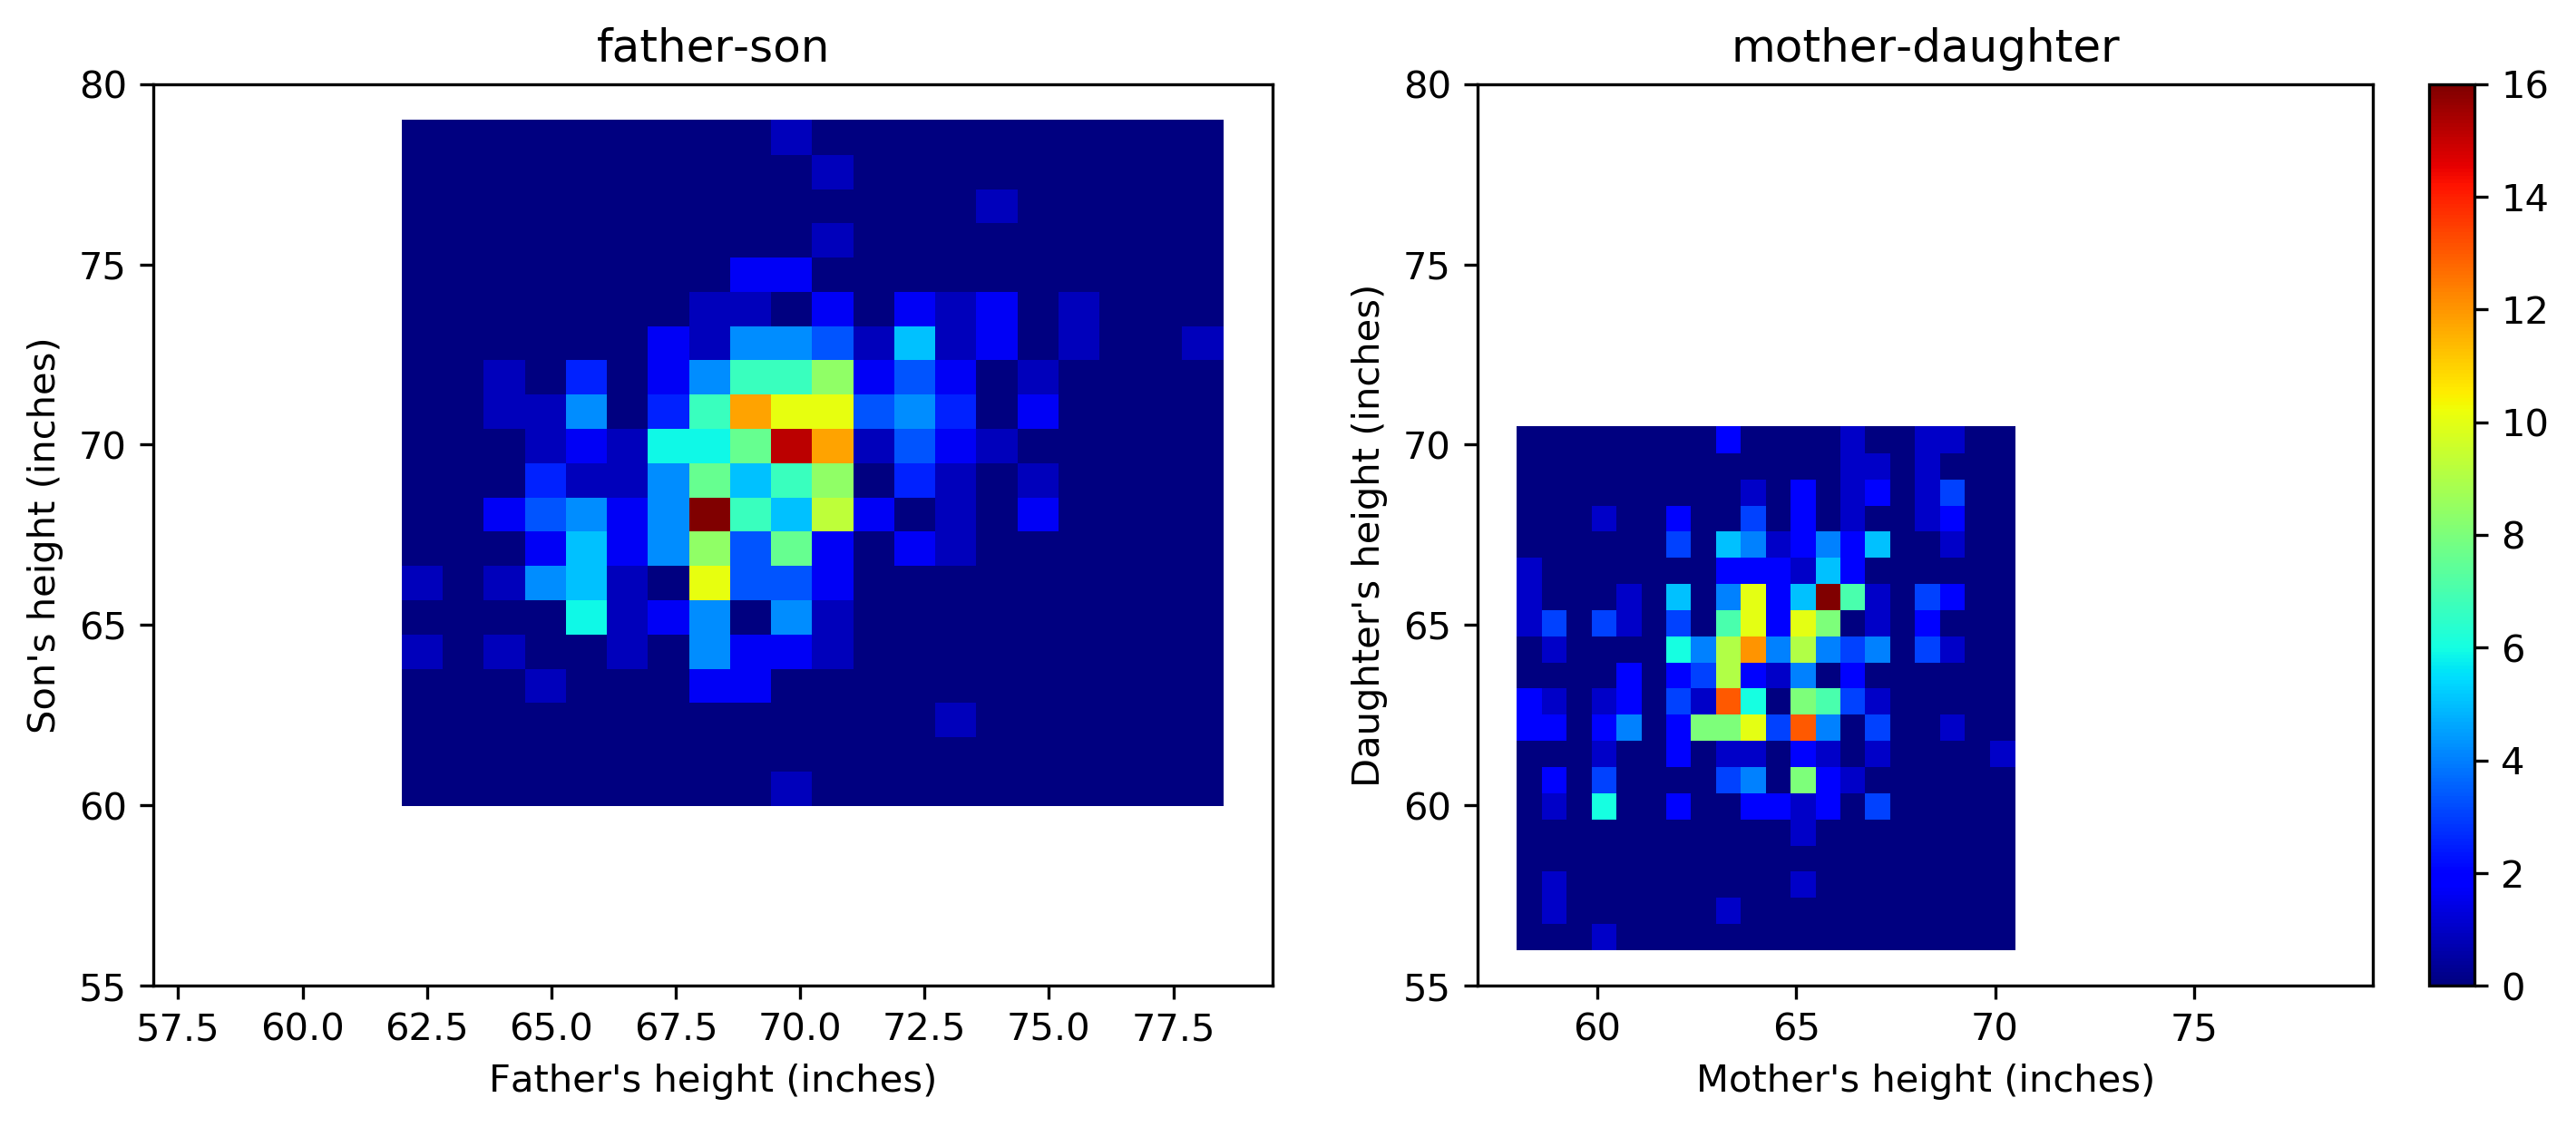

In [140]:
data = np.genfromtxt('Galton.txt',names=True,dtype=None,encoding=None)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4.5),dpi=300)
index_full = np.arange(data.shape[0])
index_male = index_full[data['Gender']=='M']
h1 = ax1.hist2d(data['Father'][index_male],data['Height'][index_male],\
                bins=(20, 20),cmap=plt.cm.jet)
ax1.set_title('father-son')
ax1.set_xlabel("Father's height (inches)")
ax1.set_ylabel("Son's height (inches)")
ax1.set_xlim([min(data['Mother'])-1,max(data['Father'])+1])
ax1.set_ylim([min(data['Height'][index_female])-1,\
              max(data['Height'][index_male])+1])

index_female = index_full[data['Gender']=='F']
h2 = ax2.hist2d(data['Mother'][index_female],data['Height'][index_female],\
                bins=(20, 20),cmap=plt.cm.jet)
ax2.set_title('mother-daughter')
ax2.set_xlabel("Mother's height (inches)")
ax2.set_ylabel("Daughter's height (inches)")
ax2.set_xlim([min(data['Mother'])-1,max(data['Father'])+1])
ax2.set_ylim([min(data['Height'][index_female])-1,\
              max(data['Height'][index_male])+1])

fig.colorbar(h2[3], ax=ax2, orientation='vertical')
fig.tight_layout(pad=2.0)

### Step 2 (2pts)

Select $X$ and $Y$ such that they have the same gender. Now compute the conditional distribution $p(y\mid x > 71)$ (for fathers and sons) or $p(y\mid x > 66)$ (for mothers and daughters). Plot their histograms and compute their means.

Answer these three questions:

* What do you find?
* With the same data, can you think of a way to test whether tall parents are causally responsible for their children being less tall?
* If there is no causal connection, what does that mean for conditioning on extreme events?

The mean of son's height given father's height is greater than 71 inches is 70.96 inches
The mean of daughter's height given mother's height is greater than 66 inches is 65.57 inches


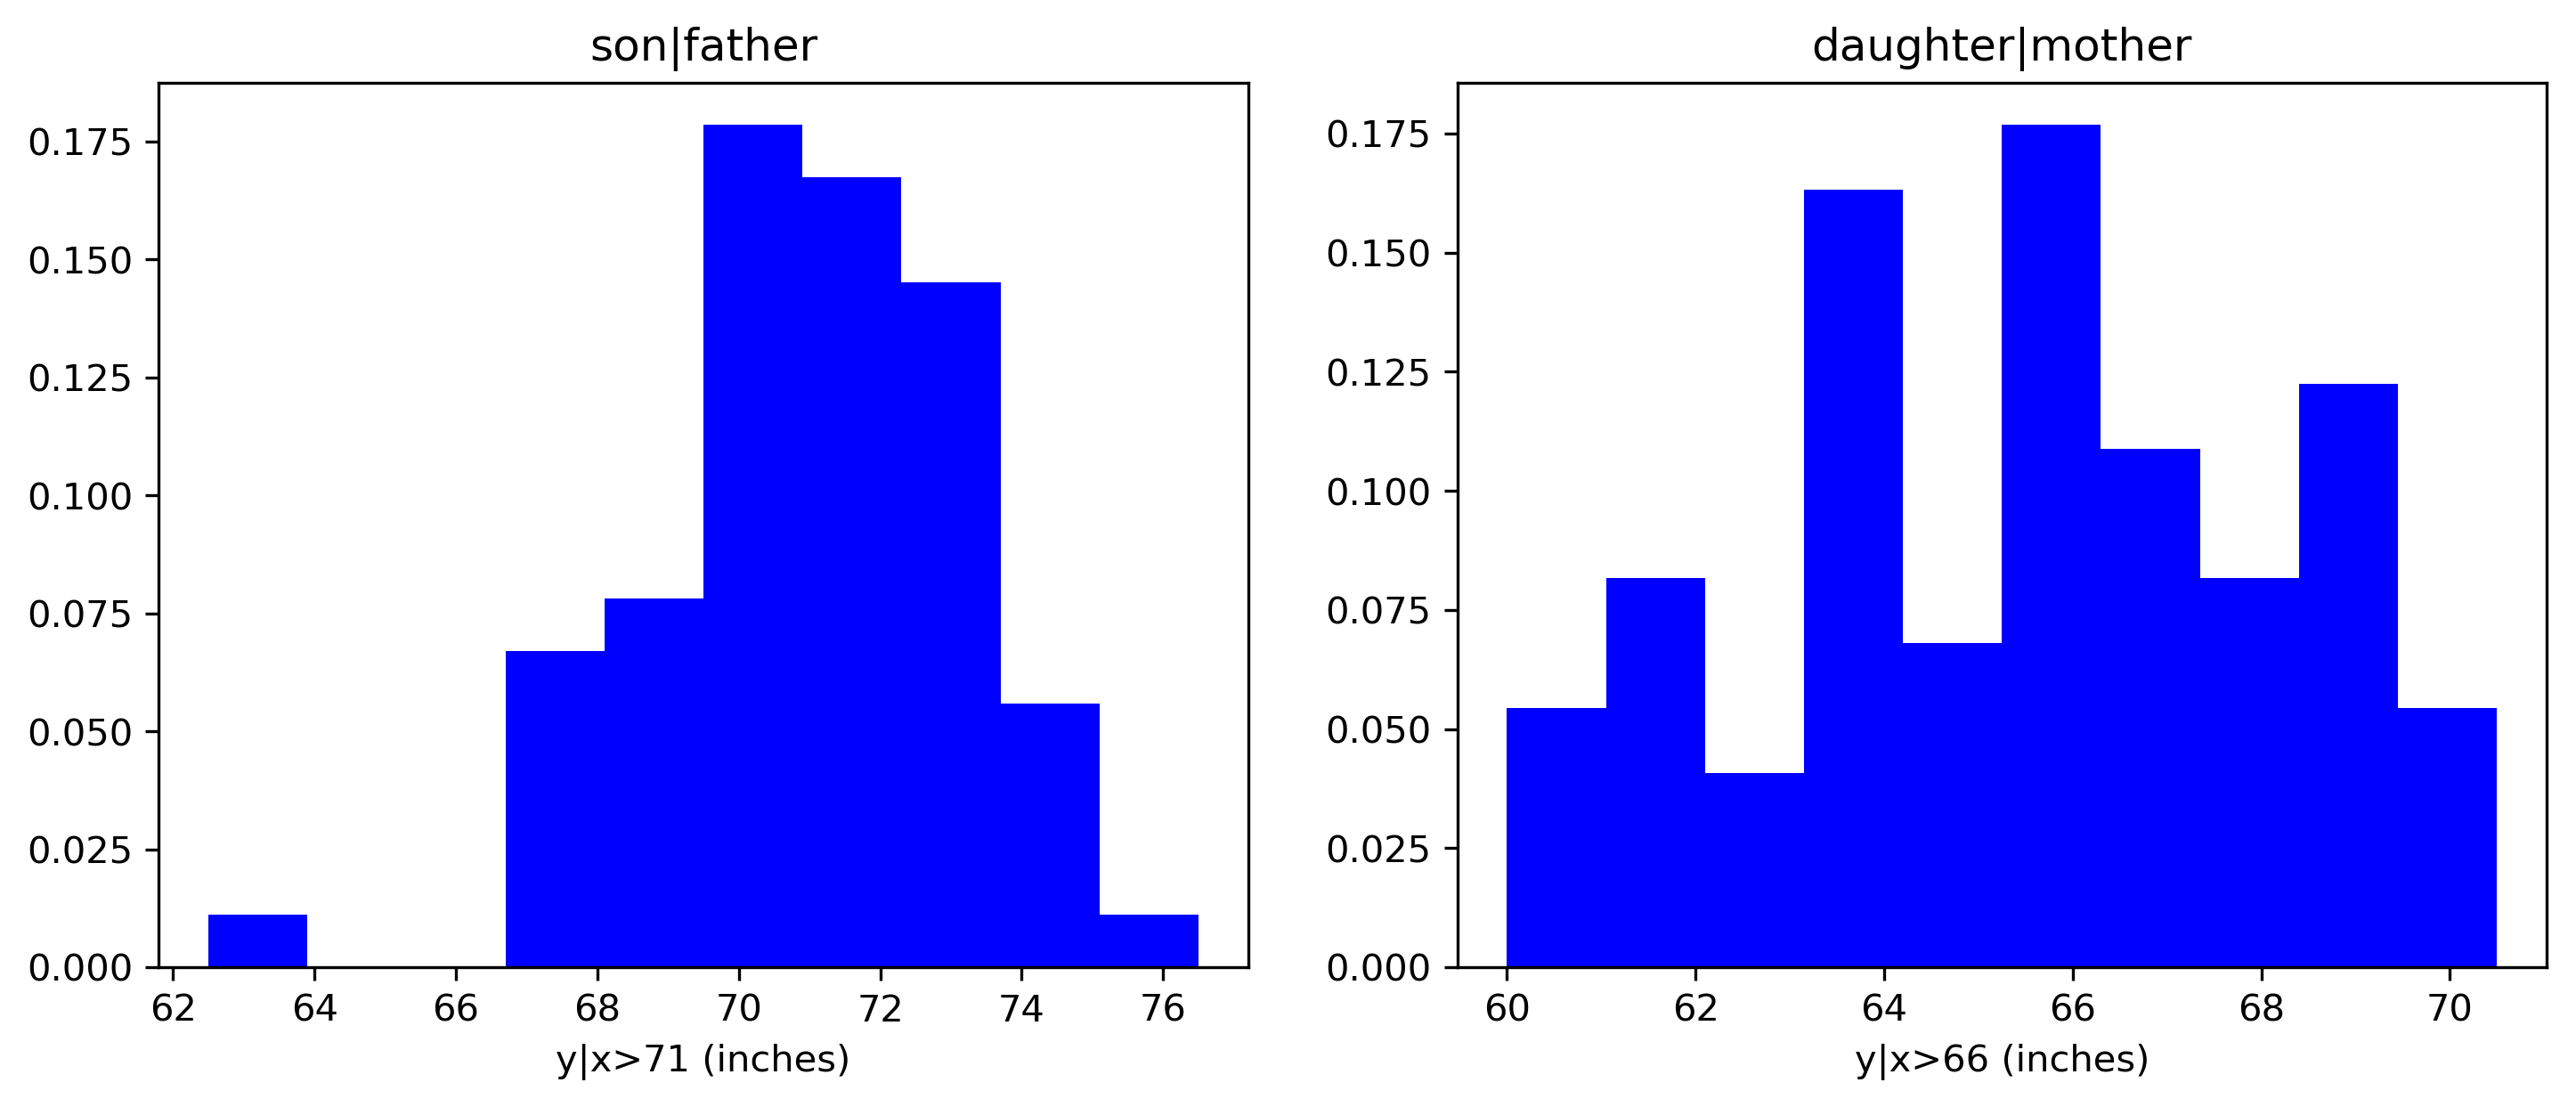

In [142]:
index_male = index_full[data['Gender']=='M']
x_m = data['Father'][index_male]
y_m = data['Height'][index_male]

index_female = index_full[data['Gender']=='F']
x_f = data['Mother'][index_female]
y_f = data['Height'][index_female]

### compute P(y|x>)
p_cond_m = y_m[x_m>71]
p_cond_f = y_f[x_f>66]
mean_cond_m = np.mean(p_cond_m)
mean_cond_f = np.mean(p_cond_f)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4.5),dpi=300)
ax1.hist(p_cond_m,density=True,facecolor='blue')
ax1.set_title('son|father')
ax1.set_xlabel('y|x>71 (inches)')

ax2.hist(p_cond_f,density=True,facecolor='blue')
ax2.set_xlabel('y|x>66 (inches)')
ax2.set_title('daughter|mother')
fig.tight_layout(pad=2.0)

print(f"The mean of son's height given father's height" 
      f" is greater than 71 inches is {mean_cond_m:.2f} inches")
print(f"The mean of daughter's height given mother's height"
      f" is greater than 66 inches is {mean_cond_f:.2f} inches")


The mean for y|x>71 is 70.96 inches and for y|x>66 is 65.57 inches. An average father measures 69.23 inches and an average mother measures 64.08 inches.\
\begin{itemize}
\item I find that taller-than-average fathers have sons who on average are shorter than them as the average of fathers taller than 71 inches is 72.87 inches but the average height of their sons is 70.96 inches. A similar trend is observed in the daughters of taller-than-average mothers.

I also find that the average height of sons (daughters) whose fathers (mothers) are taller than average is taller than the average height of all sons (daughters). So although taller-than-average fathers (mothers) have sons (daughters) shorter than them, their offsprings are still taller than the average.\ 

Combining with the joint distributions in previous hist2d plots, there seem to be a positive correlation between father and son's height as well as between mother and daughter's height.\

Moreover, the conditional distribution for y|x>71 skews toward right with a single isolated group on the very short side. The conditional distribution for y|x>66 is more symmetric.\

\item Since correlation does not imply causation, regression will not give us any information on causation. If we want to test whether tall parents lead to shorter children, we need to have an experimental group and a control group. In the experimental group, we have P(y|x>71) and P(y|x>66) for sons and daughters. In the control groups, we have P(y|x<=71) and P(y|x<=66). If there's a causal connection, the distributions of the experimental group should be different than the control group.\

\item If there's no causal connection, P(y|x>71) and P(y|x<=71) should give similar distributions (P(y|x>66) and P(y|x<=66) should also be similar). Then conditioning on extreme events or not-so-exetreme events should have similar distributions.\
\end{itemize}

## Problem 3: Likelihood vs Prior (1pt)

Leveraging again `scipy.stats`, reproduce the figure from [this](https://twitter.com/avehtari/status/1218896617346162688?s=20) tweet. To see it here, execute the next cell.

In detail, choose [Student's t distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) with 4 degrees of freedom and the standard normal distribution for either the likelihood or the prior, but separate them by $\delta x=10$. Compute and plot the posteriors.

Which of these prior distributions is more robust to outliers in the data?

In [143]:
import requests

class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

Tweet("https://twitter.com/avehtari/status/1218896617346162688?s=20")

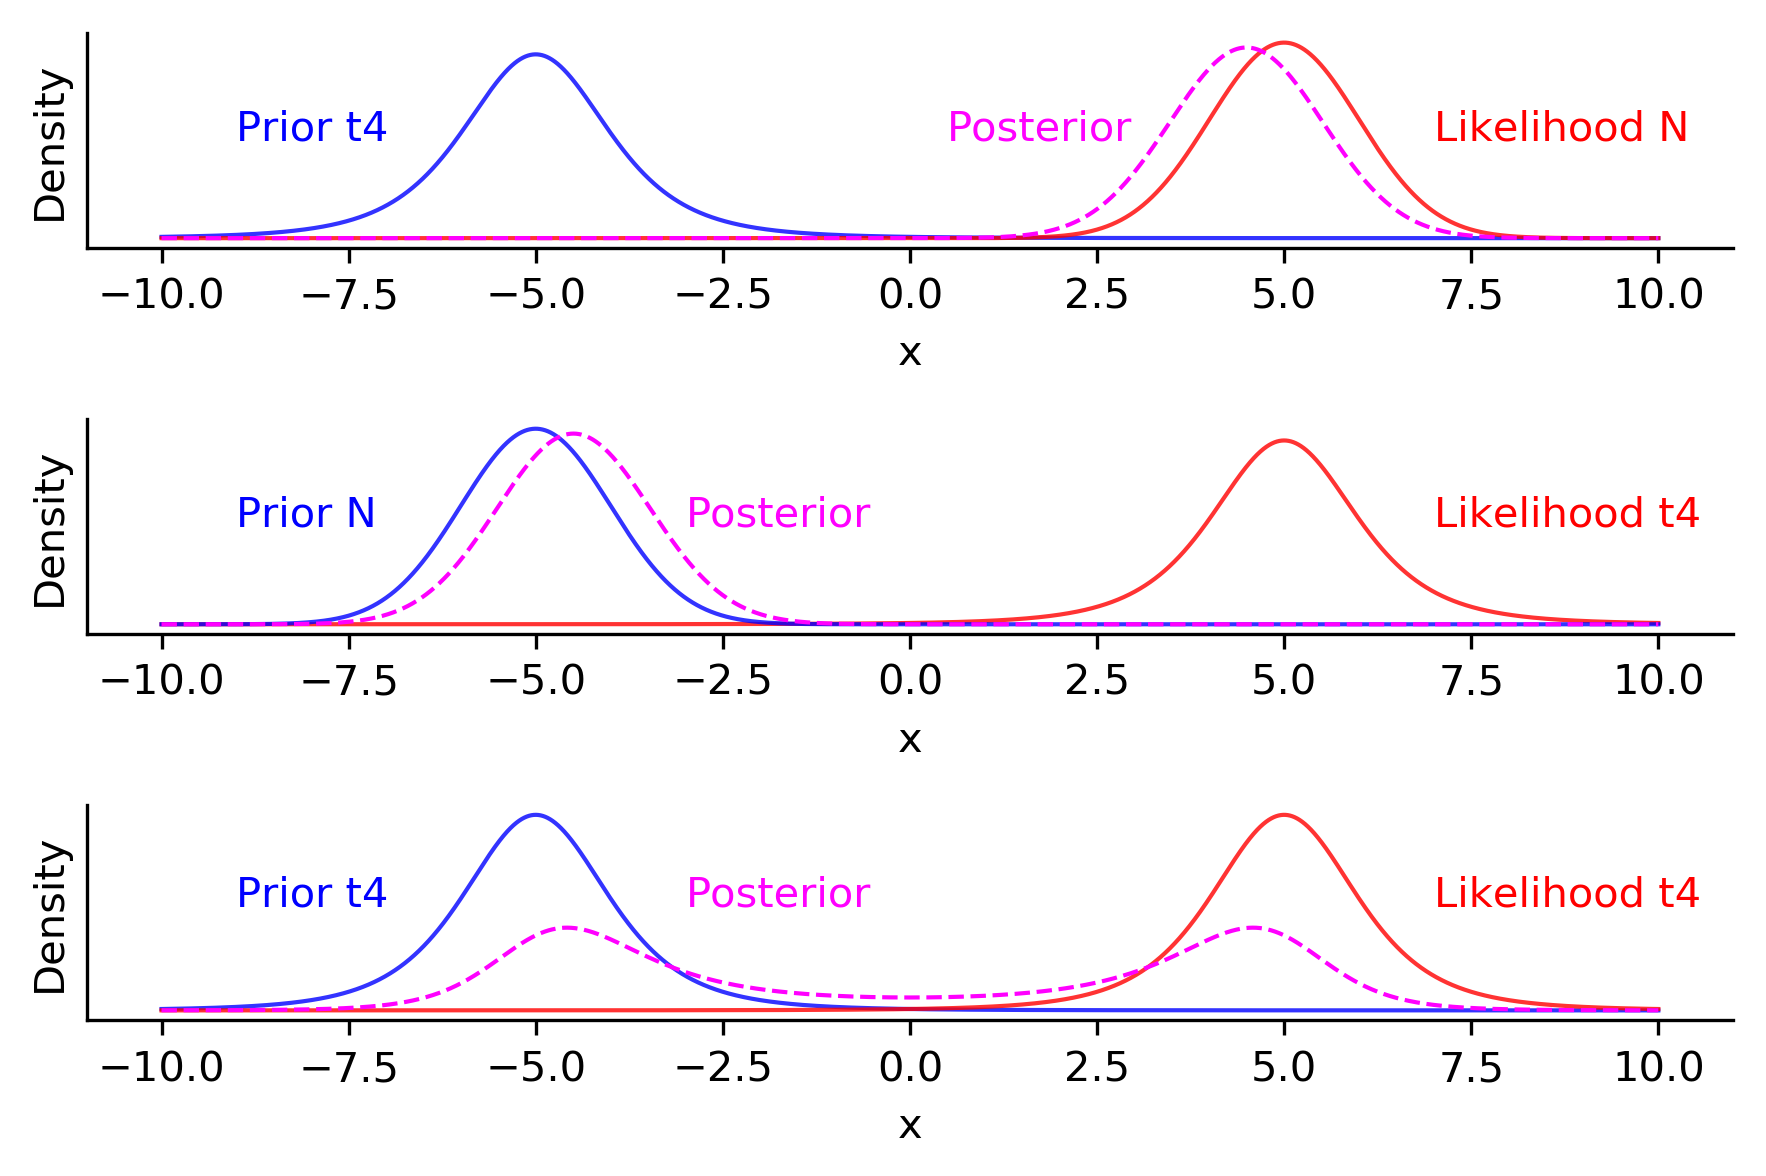

In [203]:
x = np.linspace(-10,10,num=50000)
dx = x[1]-x[0]
fig,(ax1,ax2,ax3) = plt.subplots(3,1,dpi=300)

t4 = stats.t.pdf(x, 4, loc=-5)
n = stats.norm.pdf(x,loc=5)
posterior = t4*n/np.sum(t4*n*dx) # normalized posterior
ax1.plot(x, t4,'b-', lw=1, alpha=0.8)
ax1.plot(x,n,'r-', lw=1,alpha=0.8)
ax1.plot(x,posterior,'--',color='magenta',lw=1)
ax1.text(-9, 0.2, 'Prior t4',color='blue')
ax1.text(0.5, 0.2, 'Posterior',color='magenta')
ax1.text(7, 0.2, 'Likelihood N',color='red')
ax1.set_xlabel('x')
ax1.set_yticks([])
ax1.set_ylabel('Density')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

t4 = stats.t.pdf(x, 4, loc=5)
n = stats.norm.pdf(x,loc=-5)
posterior = t4*n/np.sum(t4*n*dx) # normalized posterior
ax2.plot(x, t4,'r-', lw=1, alpha=0.8)
ax2.plot(x,n,'b-', lw=1,alpha=0.8)
ax2.plot(x,posterior,'--',color='magenta',lw=1)
ax2.text(7, 0.2, 'Likelihood t4',color='red')
ax2.text(-3, 0.2, 'Posterior',color='magenta')
ax2.text(-9, 0.2, 'Prior N',color='blue')
ax2.set_xlabel('x')
ax2.set_yticks([])
ax2.set_ylabel('Density')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

t4p = stats.t.pdf(x, 4, loc=-5)
t4l = stats.t.pdf(x, 4, loc=5)
posterior = t4p*t4l/np.sum(t4p*t4l*dx) # normalized posterior
ax3.plot(x, t4p,'b-', lw=1, alpha=0.8)
ax3.plot(x,t4l,'r-', lw=1,alpha=0.8)
ax3.plot(x,posterior,'--',color='magenta',lw=1)
ax3.text(7, 0.2, 'Likelihood t4',color='red')
ax3.text(-3, 0.2, 'Posterior',color='magenta')
ax3.text(-9, 0.2, 'Prior t4',color='blue')
ax3.set_xlabel('x')
ax3.set_yticks([])
ax3.set_ylabel('Density')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


fig.tight_layout(pad=1.0)

$t_4$ prior is more robust to outliers as it has heavier tails than a normal prior. Comparing the top and middle panels, when the likelihood $P(D|\theta)$ has a $t_4$ distribution instead of N(0,1) (heavier tails hence more outliers), the posterior distribution shifts quite a bit when the prior changes from $t_4$ to N(0,1). Comparing the top and bottom panels, when data has more outliers ($P(D|\theta) \sim t_4$ versus N(0,1)), the posterior is more stable with a $t_4$ prior than with a N(0,1) prior.

## Problem 4: Hubble was no Bayesian (4pts)

...but you can be!

In 1929, Edwin Hubble published a seminal [paper](http://www.pnas.org/content/pnas/15/3/168.full.pdf), in which he compared the radial velocity of astronomical objects (i.e. how fast these objects move towards or away from us) with their distance. The former can be done pretty precisely with spectroscopy, the latter is much more uncertain.

He saw that the velocity increases with distance and speculated that this could be the sign of a cosmological expansion. This lead cosmologist to believe in the Big Bang theory.

### Step 0:

Load the data from the file `hubble.txt` into an array with `numpy.genfromtxt`, and make again use of the arguments `names` and `dtype`. You should get 6 columns
   * `CAT`, `NUMBER`:  These two combined give you the name of the galaxy.
   * `R`: distance in Mpc
   * `V`: radial velocity in km/s
   * `RA`, `DEC`: equatorial coordinates of the galaxy
   
Make a scatter plot of $R$ vs $V$ (that means the independent variable is $V$). Don't forget labels and units...

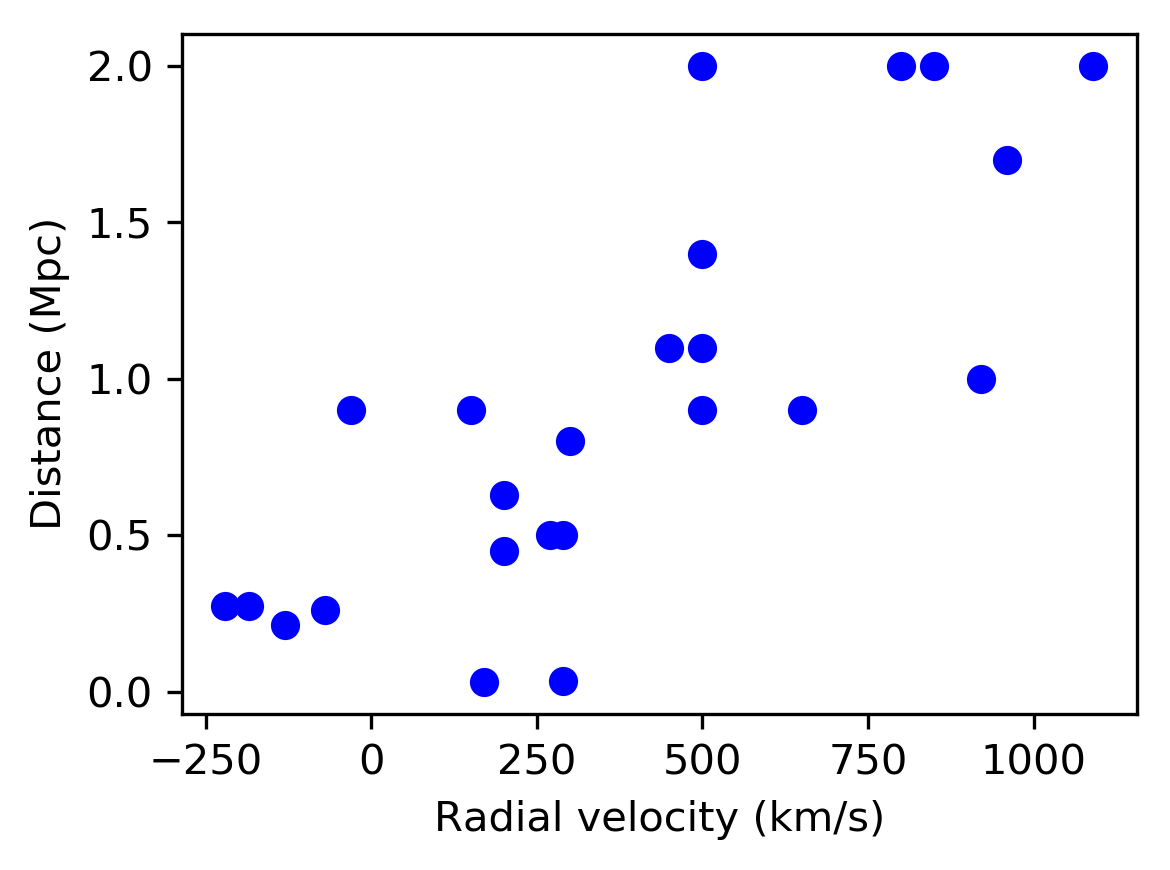

In [2]:
data = np.genfromtxt('hubble.txt',names=True,dtype=None,encoding=None)
fig = plt.figure(figsize=(4,3),dpi=300)
plt.scatter(data['V'],data['R'],color ='blue')
plt.ylabel('Distance (Mpc)')
plt.xlabel('Radial velocity (km/s)')
fig.tight_layout()

### Step 1 (1pt):

Use linear regression to determine the MLE of the slope $b$ for the line $R=b V$. This is a linear model **with no intercept**. Print the MLE. Then, create a new version of the scatter plot by adding the MLE line.

**Tip:** You don't need measurement uncertainties (there aren't any in Hubble's data) to determine the MLE.

MLE of the slope = 0.00192


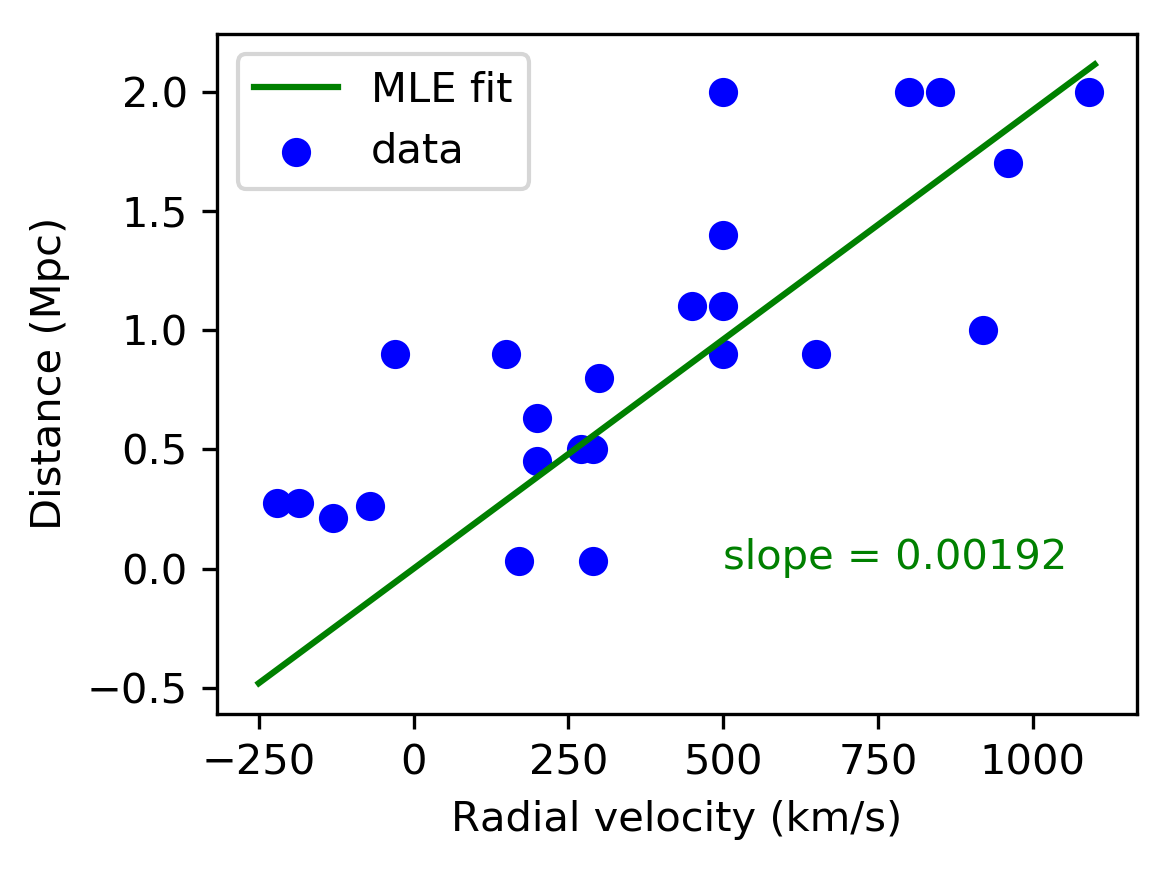

In [3]:
x = data['V']
y = data['R']
coef = 1/np.dot(x,x)*np.dot(x,y)
print(f'MLE of the slope = {coef:.5f}')

x_ = np.linspace(-250,1100,100)
fig = plt.figure(figsize=(4,3),dpi=300)
plt.scatter(data['V'],data['R'],color ='blue',label='data')
plt.plot(x_,x_*coef,color ='green',label='MLE fit')
plt.text(500, 0.0, 'slope = 0.00192',color='green')
plt.ylabel('Distance (Mpc)')
plt.xlabel('Radial velocity (km/s)')
plt.legend(loc=0)
fig.tight_layout()

### Step 2 (2pts):

The full Gaussian likelihood of the linear regression problem has a term for the intercept $a$, slope $b$, and *uncertainty* $\sigma$ of $R$. We will assume that the uncertainties of all data points are identical. Adopt maximally uniformative priors for all of the parameters $\theta=(a,b,\sigma)$.

Compute the log posterior on a reasonably fine grid of $(a,b,\sigma)$, picking suitable limits for every parameter. Then marginalize out $\sigma$ and plot the log posterior for the remaining parameters $(a,b)$.

**Tip:** The function `scipy.special.logsumexp` is useful.

\vspace{1cm}
Let $\epsilon = (R - \hat{R}) \sim N(0,\sigma^2)$, where $\hat{R} = \mu = bV+a$, the log likelihood $l(\theta) = logP(R|\theta) = -log\sigma - \frac{(r-\mu)^2}{2\sigma^2}$. Then the Fisher information matrix is:
\begin{flalign*}
I(\theta) &= -E_{\theta}\begin{pmatrix}
\frac{\partial^2 l(\theta)}{\partial \mu^2} & \frac{\partial^2 l(\theta)}{\partial \mu\partial\sigma} \\
\frac{\partial^2 l(\theta)}{\partial \sigma\partial\mu} & \frac{\partial^2 l(\theta)}{\partial \sigma^2}
\end{pmatrix} &\\
&= -E_{\theta}\begin{pmatrix} 
-\frac{1}{\sigma^2} & \frac{-2(r-\mu)}{\sigma^3} \\
\frac{-2(r-\mu)}{\sigma^3} & \frac{1}{\sigma^2}-\frac{3(x-\mu)^2}{\sigma^4}
\end{pmatrix} &\\
&= \begin{pmatrix}
\frac{1}{\sigma^2} & 0 \\
0 & \frac{2}{\sigma^2}                
\end{pmatrix}
\end{flalign*}

Therefore the maximally uninformative priors for $P(\theta) = P(a,b,\sigma) = P(\mu,\sigma) = \frac{1}{\sigma}\cdot \frac{\sqrt{2}}{\sigma} \propto \frac{1}{\sigma^2}$, using the fact that $\mu$ and $\sigma$ are independent. Since the log likelihood $logP(\{r_n\}|a,b,\{v_n\},\sigma) = -\frac{N}{2}log(2\pi) - \frac{1}{2}\sum_{n=1}^N[\frac{(r_n-bv_n-a)^2}{\sigma^2}+log(\sigma^2)]$, we can create a grid of $(a,b,\sigma)$, varying the paramters while using the same $\{v_n,r_n\}$ data to express log likelihood as a function of the parameters. Then the log posterior is $logP(\theta|\{r_n\}) = logP(\{r_n\}|\theta) + logP(\theta)$. Since we only care about the shape of log posterior, we will not normalize the posterior by evidence here.\\


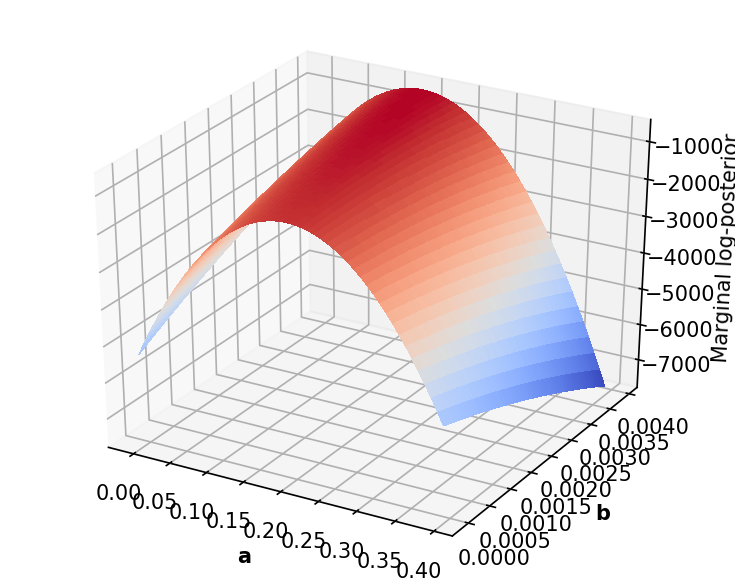

In [72]:
def log_likelihood(r, v, a, b, sigma):
    N = v.shape[0]
    res = -N/2*np.log(2*np.pi) - N/2*np.log(sigma**2)
    res += -1/2*np.sum((r-(b*v+a))**2/(sigma**2))
    return res

ngrid = 50
b_grid = np.linspace(coef-0.002,coef+0.002,ngrid)
Ea = np.mean(y-np.dot(coef,x))  #Ea = E(R-bV)
a_grid = np.linspace(Ea-0.2,Ea+0.2,ngrid)
Esigma = np.std(y-np.dot(coef,x))
sigma_grid = np.linspace(Esigma-0.2,Esigma+0.2,ngrid)

log_posterior = []
for a in a_grid:
    for b in b_grid:
        for sigma in sigma_grid:            
            log_posterior.append(log_likelihood(y,x,a,b,sigma)+
                                 np.log(np.sqrt(2)/(sigma**2)))
marginal_log_posterior = np.sum(np.reshape(log_posterior,(-1,ngrid)),axis=1)
marginal_log_posterior_2d = np.reshape(marginal_log_posterior,(-1,ngrid))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(5,4),dpi=150)
X, Y = np.meshgrid(a_grid, b_grid)
surf = ax.plot_surface(X, Y, marginal_log_posterior_2d,
                       cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_ylabel('b',fontdict=dict(weight='bold'))
ax.set_xlabel('a',fontdict=dict(weight='bold'))
ax.set_zlabel('Marginal log-posterior')
plt.tight_layout()
plt.show()

### Step 3 (1pt):

Use the function `sample_2d` below to draw samples from the 2D array of the posterior of $(a,b)$. Create a final version of the scatter plot by adding the lines that correspond to these posterior draws.

**Tip:** When plotting, set the transparency `alpha` to values < 1, so that multiple draws of the same parameter pair become visually more important.

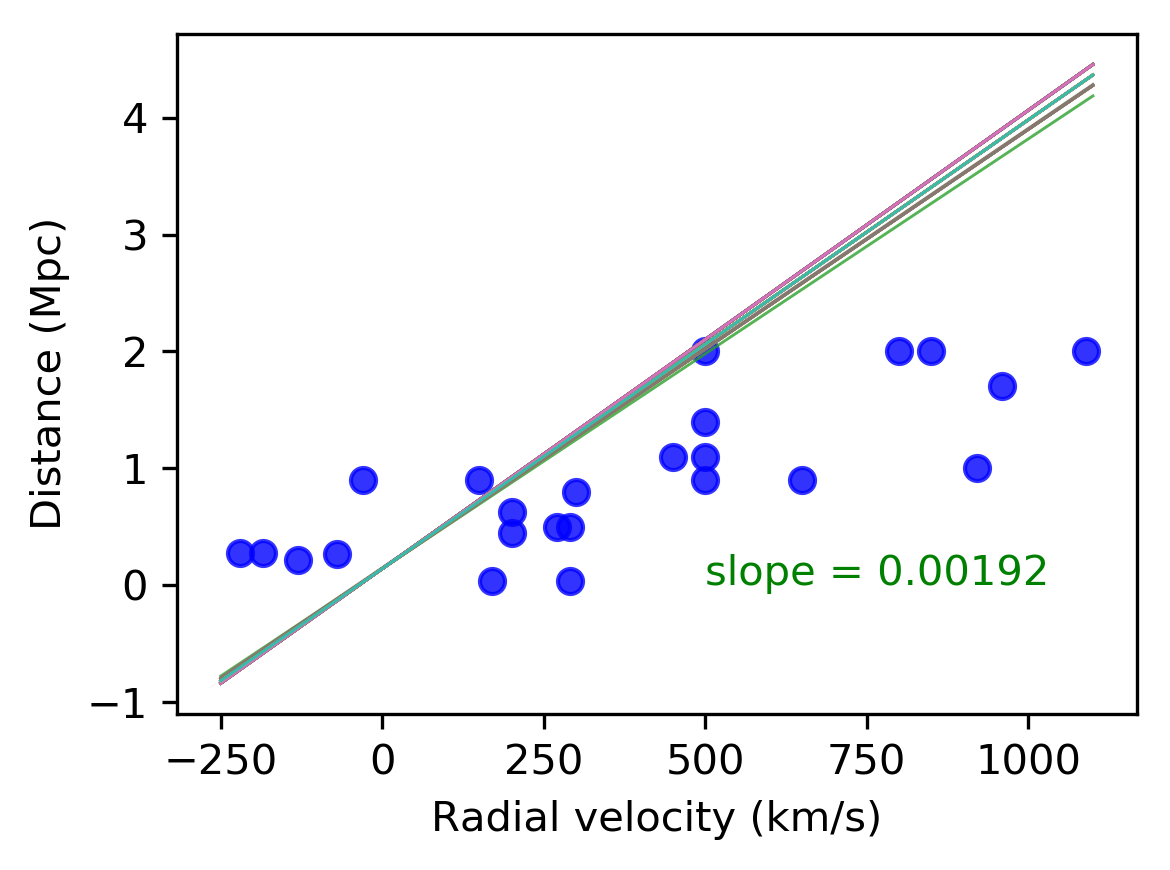

In [76]:
# taken from https://stackoverflow.com/questions/56017163
import random
random.seed(42)

def sample_2d(dist2d, n=50, replace=True):
    """
    Given an array representing a 2D joint probability distribution p(x,y), return n index pairs (i_x, i_y) sampled
    according to that distribution
    """
    import numpy as np

    shape = dist2d.shape
    N = np.prod(shape)
    
    # generate the set of all x,y pairs represented by the pmf
    pairs=np.indices(dimensions=shape).T # here are all of the x,y pairs 

    # make n random selections from the flattened pmf
    inds = np.random.choice(np.arange(N), p=dist2d.reshape(N), size=n, replace=replace)

    # inds is the set of n randomly chosen indicies into the flattened dist array...
    # therefore the random x,y selections
    # come from selecting the associated elements
    # from the flattened pairs array
    return pairs.reshape(-1,2)[inds]

norm_const = 1/np.sum(np.exp(marginal_log_posterior_2d))
posterior = norm_const*np.exp(marginal_log_posterior_2d)
idx = sample_2d(posterior)
a_,b_ = a_grid[idx[:,0]],b_grid[idx[:,1]]

x = data['V']
y = data['R']

x_ = np.linspace(-250,1100,100)
fig = plt.figure(figsize=(4,3),dpi=300)
plt.scatter(data['V'],data['R'],color ='blue',alpha=0.8)
for i in range(a_.shape[0]):
    plt.plot(x_,x_*b_[i]+a_[i],alpha=0.8,linewidth=0.7)

plt.ylabel('Distance (Mpc)')
plt.xlabel('Radial velocity (km/s)')
fig.tight_layout()